#Lista 4

Nome: Lucas Martins Oliveira 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

1) Simule uma reação enzimática pelo modelo de Michaeles-Menten usando o método de Runge-Kutta Clássico e Trapezio
          \begin{equation*}
              \begin{cases}
              \frac{d[S]}{dt} &= k_{-1}[C] - k_{+1}[S][E]\\
              \frac{d[E]}{dt} &= (k_{-1}+k_{+2})[C] - k_{+1}[S][E]\\
              \frac{d[C]}{dt} &= -(k_{-1}+k_{+2})[C] + k_{+1}[S][E]\\
              \frac{d[P]}{dt} &= k_{+2}[C]
              \end{cases}
          \end{equation*} 

Utilize as condições iniciais: $s0=10.0$, $e0=2.0$ e $c0=p0=0.0$; e parâmetros $k_{1+} = 0.01$, $k_{1-} = 0.02$ e $k_{2+} = 0.03$.

Para o Método de Runge-Kutta Clássico temos que o mesmo segue o seguinte padrão: 

\begin{equation*}
  Y_1 = y_n \\
  Y_2 = y_n + \frac{h}{2}f(t_n, Y_1)\\
  Y_3 = y_n + \frac{h}{2}f(t_{n+1/2}, Y_2)\\
  Y_4 = y_n + hf(t_{n+1/2}, Y_3)\\
\end{equation*}

em que 
\begin{equation*}
  y_{n+1} = y_n + \frac{h}{6}[f (t_n, Y_1)+2f (t_{n+ \frac{1}{2}}, Y_2)+2f (t_{n+ \frac{1}{2}}, Y_3)+f (t_n, Y_4)].
\end{equation*} representa o método de Runge-Kutta de 4 ordem

Para o método do Trapézio
\begin{align*}
u_{n+1} = u_n + \frac{h}{2} [ f(t_n, u_n) + f(t_{n+1} , u_{n+1}) ] 
\end{align*}
como
\begin{align*}
f(t_n, u_n) &= q u_n\\
f(t_{n+1}, u_{n+1}) &= q u_{n+1}
\end{align*}
temos
\begin{align*}
u_{n+1} &= u_n + \frac{h q}{2} u_n + \frac{h q}{2} u_{n+1}\\
u_{n+1} - \frac{h q}{2} u_{n+1} &= u_n + \frac{h q}{2} u_n\\
u_{n+1} \left(1 - \frac{hq}{2}\right) &= u_n \left(1 + \frac{hq}{2}\right)\\
u_{n+1} &= u_n \left( \frac{1 + \frac{hq}{2}}{1 - \frac{hq}{2}} \right)
\end{align*}

\begin{align*}
u_{n+1} = \left( \frac{1 + \frac{hq}{2}}{1 - \frac{hq}{2}} \right) u_n
\end{align*}
Como $u_0=1$, temos
\begin{align*}
u_1 = \left( \frac{1 + \frac{hq}{2}}{1 - \frac{hq}{2}} \right)u_0,
u_2 = \left( \frac{1 + \frac{hq}{2}}{1 - \frac{hq}{2}} \right)^2u_0,
\ \ldots, \
u_n = \left( \frac{1 + \frac{hq}{2}}{1 - \frac{hq}{2}} \right)^nu_0
\end{align*}

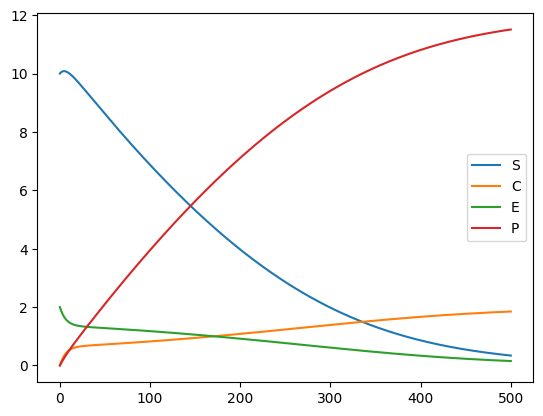

In [ ]:
#parâmetros
k1p = 0.01 
k1m = 0.02
k2p = 0.03

#condições iniciais 
s0 = 10
e0 = 2
c0 = 0
p0 = 0

def func_mm(t, u):
  '''
  u[0] = > s
  u[1] = > e
  u[2] = > c
  u[3] = > p
  '''
  dsdt = k1m*u[2] - (k1p*u[0]*u[1])
  dedt = (k1m + k2p)*u[2] - (k1p*u[0]*u[1])
  dcdt = -1*(k1m + k2p)*u[2] + (k1p * u[0] * u[1])
  dpdt = k2p * u[2]

  return np.array([ dsdt, dedt, dcdt, dpdt ])

#Runge-Kutta Clássico
def runge_kutta(f, u0, tspan, n):
  '''
  f => funcao
  u0 => condicao inicial
  tspan => intervalo [t0,tf]
  n => numero de passos
  '''
  h = (tspan[1]-tspan[0])/(n)
  u = np.zeros((len(u0),n+1))
  t = np.zeros(n+1)
  
  u[:,0] = u0
  t[0] = tspan[0]
  for i in range(n):
    t[i+1] = t[i] + h

    y1 = u[:,i]
    y2 = u[:,i] + h/2.0 * f(t[i], y1)
    y3 = u[:,i] + h/2.0 * f(t[i] + h/2.0, y2)
    y4 = u[:,i] + h * f(t[i] + h/2.0, y3)

    u[:,i+1] = u[:,i] + h/6.0 * (f(t[i], y1) + 2*f(t[i] + h/2.0, y2) + 2*f(t[i] + h/2.0, y3) + f(t[i], y4))
  
  return t, u

#Método do Trapézio 
def trapezoidal( f, u0, tspan, n ):
  '''
  f     => funcao
  u0    => condicao inicial
  tspan => intervalo [t0,tf]
  n     => numero d e passos
  '''
  t = np.zeros (n+1)
  u = np.zeros((len(u0),n+1))

  h = ( tspan[1] - tspan[0] ) / float ( n )

  t[0] = tspan[0];
  u[:,0] = u0

  for i in range(n):
    to = t[i]
    uo = u[:,i]
    tp = t[i] + h
    up = uo + h * f ( to, uo )

    up = fsolve ( trapezoidal_residual, up, args = ( f, to, uo, tp ) )

    t[i+1] = tp
    u[:,i+1] = up

  return t, u

def trapezoidal_residual( up, f, to, uo, tp ):
  '''
  Estamos procurando o valor de UP definida pela seguinte equacao implicita
    UP = UO + ( TP - TO )/2 *(F ( TO, UO )+F ( TP, UP )) 

  up => solucao estimada no novo passo
  f  => funcao
  to => passo de tempo anterior
  u0 => solucao no passo de tempo anterior
  tp => novo passo de tempo.
  '''
  value = up - uo - ( tp - to )/2 * (f ( to, uo )+ f ( tp, up ));

  return value

print("Gráfico Runge Kutta Clássico")
t, s_rk = runge_kutta(func_mm,[s0,c0,e0,p0],[0,500],5000)
plt.plot(t, s_rk[0,:], label='S')
plt.plot(t, s_rk[1,:], label='C')
plt.plot(t, s_rk[2,:], label='E')
plt.plot(t, s_rk[3,:], label='P')

plt.legend()

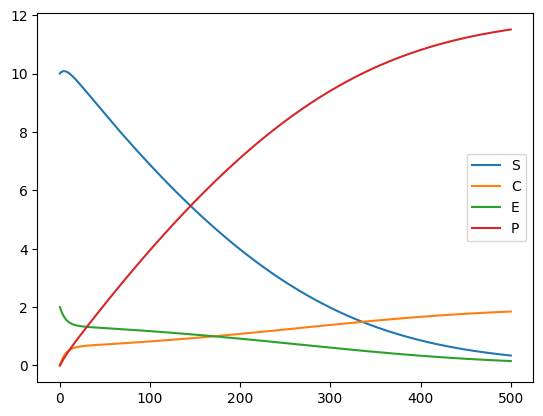

In [ ]:
print("Gráfico método do Trapézio ")
t, s_trap = trapezoidal(func_mm,[s0,c0,e0,p0],[0,500],5000)
plt.plot(t, s_trap[0,:], label='S')
plt.plot(t, s_trap[1,:], label='C')
plt.plot(t, s_trap[2,:], label='E')
plt.plot(t, s_trap[3,:], label='P')

plt.legend()

Utilizando os metodos numéricos aprendidos resolva o modelo de Lotka-Volterra
       \begin{equation*}
            \begin{cases}
                \displaystyle \frac{d L}{dt} & = \alpha L - \beta L A\\
                \displaystyle \frac{d A}{dt} & = \delta LA - \gamma A\\
            \end{cases}
        \end{equation*}


Simule 20 u.t. utilizando 101 passos de tempo, os parâmetros $\alpha =\beta =\gamma =\delta =1$ e condições iniciais $L_0=2.0$ e $A_0=1.0$. Como ficou a simulação?
        
a) Utilizando Euler Explícito
        
b) Utilizando Euler Implícito

Para o Euler Explícito temos que para calcular o elemento sucessor \begin{align*}u_{n+1}\end{align*} dependemos apenas de valores passados da solução, que no caso de já serem conhecidos, podemos simplesmente calcular o valor aproximado da expressão em questão. 
Assim a dedução desse método se dá através desse modelo matemático simplificado mostrado abaixo: 

Escrevendo a solução do problema $u(t)$ usando série de Taylor em torno
do ponto $t_n$ temos
\begin{align*}
u(t) = u(t_n) + u'(t_n)(t-t_n) + u''(t_n) \tfrac{(t-t_n)^2}{2} + \ldots
\end{align*}  
avaliando em $t_{n+1}$ resulta
\begin{align*}
u(t_{n+1}) = u(t_n) + u'(t_n)(t_{n+1}-t_n) + u''(t_n) \tfrac{(t_{n+1}-t_n)^2}{2} + \ldots
\end{align*}  
desprezando os termos depois da segunda derivada e considerando que $h=t_{n+1} - t_n$ e que $u' = f(t,u)$, temos

\begin{align*}
u(t_{n+1}) \approx u(t_n) + h f'(t_n, u(t_n))
\end{align*}  
de onde obtemos o **método de Euler explícito** como

\begin{align*}
u_{n+1} = u_n + h f(t_n, u_n)
\end{align*}

In [3]:
#constantes
alfa = 1
beta = 1
gama = 1
delta = 1

#condicoes iniciais 
L0 = 2
A0 = 1

#passos de tempo e u.t. 
passos = 1001
ut = 20

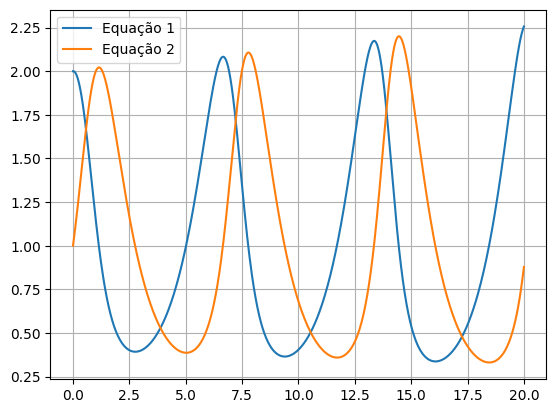

In [10]:
#EULER EXPLÍCITO 

def LA_euler_explicito(f1, f2, LO, A0, ut, passos):
  '''
  f1 => equacao da primeira linha 
  f2 => equacao da segunda linha 
  L0 => condicao inicial para a primeira equação
  A0 => condicao inicial para a segunda equação
  ut => intervalo [t0,tf]
  passos => numero de passos
  '''
  h = (ut[1]-ut[0])/(passos)
  L = np.zeros(passos+1)
  A = np.zeros(passos+1)
  t = np.zeros(passos+1)
  
  L[0] = L0
  A[0] = A0
  t[0] = ut[0]

  for i in range(passos):
    t[i+1] = t[i] + h
    L[i+1] = L[i] + h*f1(t[i], L[i], A[i])
    A[i+1] = A[i] + h*f2(t[i], A[i], L[i])
  
  return t, L, A

def func_eq1(t, L, A):
  return (alfa* L) - (beta * L * A)

def func_eq2(t, A, L):
  return (delta * A * L) - (gama * A)

t, L_explicito, A_explicito = LA_euler_explicito(func_eq1,func_eq2,L0,A0,[0,ut],passos)

plt.plot(t,L_explicito, '-', label="Equação 1")
plt.plot(t,A_explicito, '-', label="Equação 2")
plt.grid()
plt.legend()


\begin{align*}
  \text{Esse método é chamado de implícito, pois para o cálculo do sucessor } u_{n+1} 
  \text{ também depende da solução no passo } u_{n+1} 
  \text {através de } f(t_{n+1},u_{n+1}) \\
\end{align*} 

Assim esse modelo pode ser descrito através da seguinte modelagem matemática: 

Escrevendo $u(t)$ em série de Taylor em torno de $t_{n+1}$, temos
\begin{align*}
u(t) = u(t_{n+1}) + (t-t_{n+1}) u'(t_{n+1})
\end{align*}
Avaliando em $t=t_n$ e substituindo $u' = f$ chegamos a
\begin{align*}
u(t_n) = u(t_{n+1}) + \underbrace{(t_n-t_{n+1})}_{=-h} f(t_{n+1}, u(t_{n+1}))
\end{align*}  
de onde obtemos o método
\begin{align*}
{u_{n+1}} = u_n + h f(t_{n+1}, {u_{n+1}})
\end{align*}

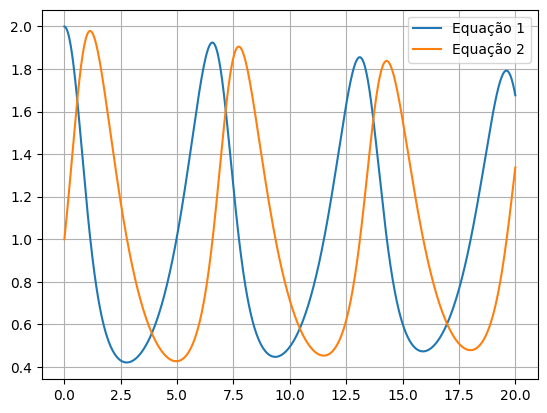

In [9]:
#EULER IMPLÍCITO 
from scipy.optimize import fsolve

def func_dt(t, u):
  '''
  u[0] = > l
  u[1] = > a
  '''
  dldt = alfa * u[0] - beta * u[0] * u[1]
  dadt = delta * u[0] * u[1] - gama * u[1]

  return np.array([ dldt, dadt ])

def backward_euler ( f, u0, tspan, n ):
  '''
  f     => funcao
  u0    => condicao inicial
  tspan => intervalo [t0,tf]
  n     => numero d e passos
  '''
  t = np.zeros (n+1)
  u = np.zeros((len(u0),n+1))

  h = ( tspan[1] - tspan[0] ) / float ( n )

  t[0] = tspan[0];
  u[:,0] = u0

  for i in range(n):
    to = t[i]
    uo = u[:,i]
    tp = t[i] + h
    up = uo + h * f ( to, uo )

    up = fsolve ( backward_euler_residual, up, args = ( f, to, uo, tp ) )

    t[i+1]   = tp
    u[:,i+1] = up

  return t, u

def backward_euler_residual( up, f, to, uo, tp ):
  '''
  Estamos procurando o valor de UP definida pela seguinte equacao implicita
    UP = UO + ( TP - TO ) * F ( TP, UP )

  up => solucao estimada no novo passo
  f  => funcao
  to => passo de tempo anterior
  u0 => solucao no passo de tempo anterior
  tp => novo passo de tempo.
  '''
  value = up - uo - ( tp - to ) * f ( tp, up );

  return value

t, LA_implicito = backward_euler(func_dt,[L0, A0],[0,ut],passos)

plt.plot(t,LA_implicito[0,:], '-', label="Equação 1")
plt.plot(t,LA_implicito[1,:], '-', label="Equação 2")
plt.grid()
plt.legend()
# plt.savefig('euler_comparativo.pdf')

#print(t, u_implicito)

